Build Simple Mushroom Classifier

In [1]:
from pathlib import Path
from fastai.vision.all import *

Load Images for 11 Taxa with 100 Images Each
Uncomment second line to use 100 Taxa with 100 Images Each

In [2]:
# MO_URL = "https://mushroomobserver.org/mo_11_100.tgz"
MO_URL = "https://images.mushroomobserver.org/mo_100_100.tgz"
path = untar_data(MO_URL)
fnames = get_image_files(path)
SYNONYMS = {
    'Clitocybe_nuda': 'Lepista_nuda',
    'Pluteus_cervinus': 'Pluteus_cervinus_group',
    'Amanita_amerirubescens': 'Amanita_amerirubescens_group',
    'Boletus_edulis': 'Boletus_edulis_group',
    'Coprinellus_micaceus': 'Coprinellus_sect._Micacei',
}

def label_func(x):
    dirname = x.parent.name
    return SYNONYMS.get(dirname, dirname)

dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
learn = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Run Training

In [3]:
print(datetime.now())
learn.fine_tune(10)
print(datetime.now())

2022-07-23 14:03:54.141471


epoch,train_loss,valid_loss,error_rate,time
0,4.415575,2.667609,0.670000,00:41


epoch,train_loss,valid_loss,error_rate,time
0,2.762125,2.079912,0.542500,00:46
1,2.248120,1.744374,0.475000,00:47
2,1.850032,1.644549,0.455500,00:46
3,1.561257,1.531357,0.416500,00:47
4,1.212975,1.419614,0.384000,00:47
5,0.950835,1.374946,0.368500,00:47
6,0.759881,1.288337,0.348500,00:47
7,0.546240,1.252453,0.340500,00:48
8,0.459492,1.234998,0.339000,00:47
9,0.413861,1.230033,0.341000,00:48


2022-07-23 14:12:31.979179


In [4]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('Pleurotus_ostreatus', 'Pleurotus_pulmonarius', 8),
 ('Fomitopsis_pinicola', 'Fomitopsis_mounceae', 7),
 ('Amanita_bisporigera', 'Amanita_sect._Phalloideae', 6),
 ('Amanita_sect._Phalloideae', 'Amanita_bisporigera', 5),
 ('Fomitopsis_mounceae', 'Fomitopsis_pinicola', 5),
 ('Mycena_leaiana', 'Flammulina_velutipes', 5),
 ('Amanita_phalloides', 'Amanita_sect._Amanita', 4),
 ('Amanita_sect._Amanita', 'Amanita_bisporigera', 4),
 ('Pluteus_cervinus_group', 'Megacollybia_rodmanii', 4),
 ('Psilocybe_ovoideocystidiata', 'Psilocybe_cyanescens', 4),
 ('Sarcomyxa_serotina', 'Pleurotus_ostreatus', 4),
 ('Stereum_ostrea', 'Trametes_betulina', 4),
 ('Trametes_betulina', 'Trametes_gibbosa', 4),
 ('Amanita_brunnescens', 'Amanita_sect._Phalloideae', 3),
 ('Amanita_sect._Lepidella', 'Chlorophyllum_molybdites', 3),
 ('Amanita_sect._Vaginatae', 'Amanita_brunnescens', 3),
 ('Chlorophyllum_molybdites', 'Leucoagaricus_leucothites', 3),
 ('Entoloma_abortivum', 'Hypomyces_chrysospermus', 3),
 ('Fomitopsis_pin

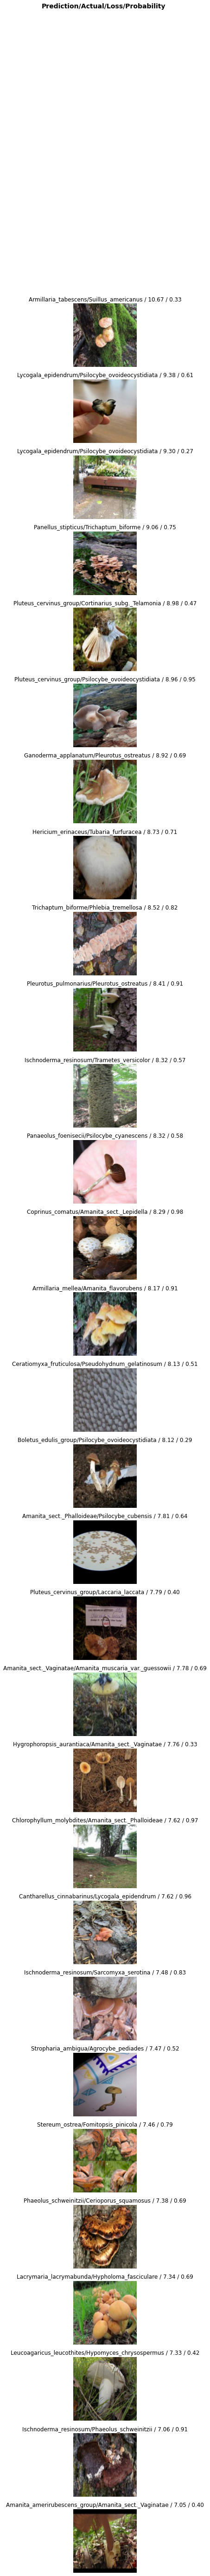

In [5]:
interp.plot_top_losses(30, nrows=30)

Save the Model

In [6]:
# learn.save("sample-11x100-model")
learn.save("sample-100x100-model")

Path('/root/.fastai/data/mo_100_100/models/sample-100x100-model.pth')

Reload and Verify the Model

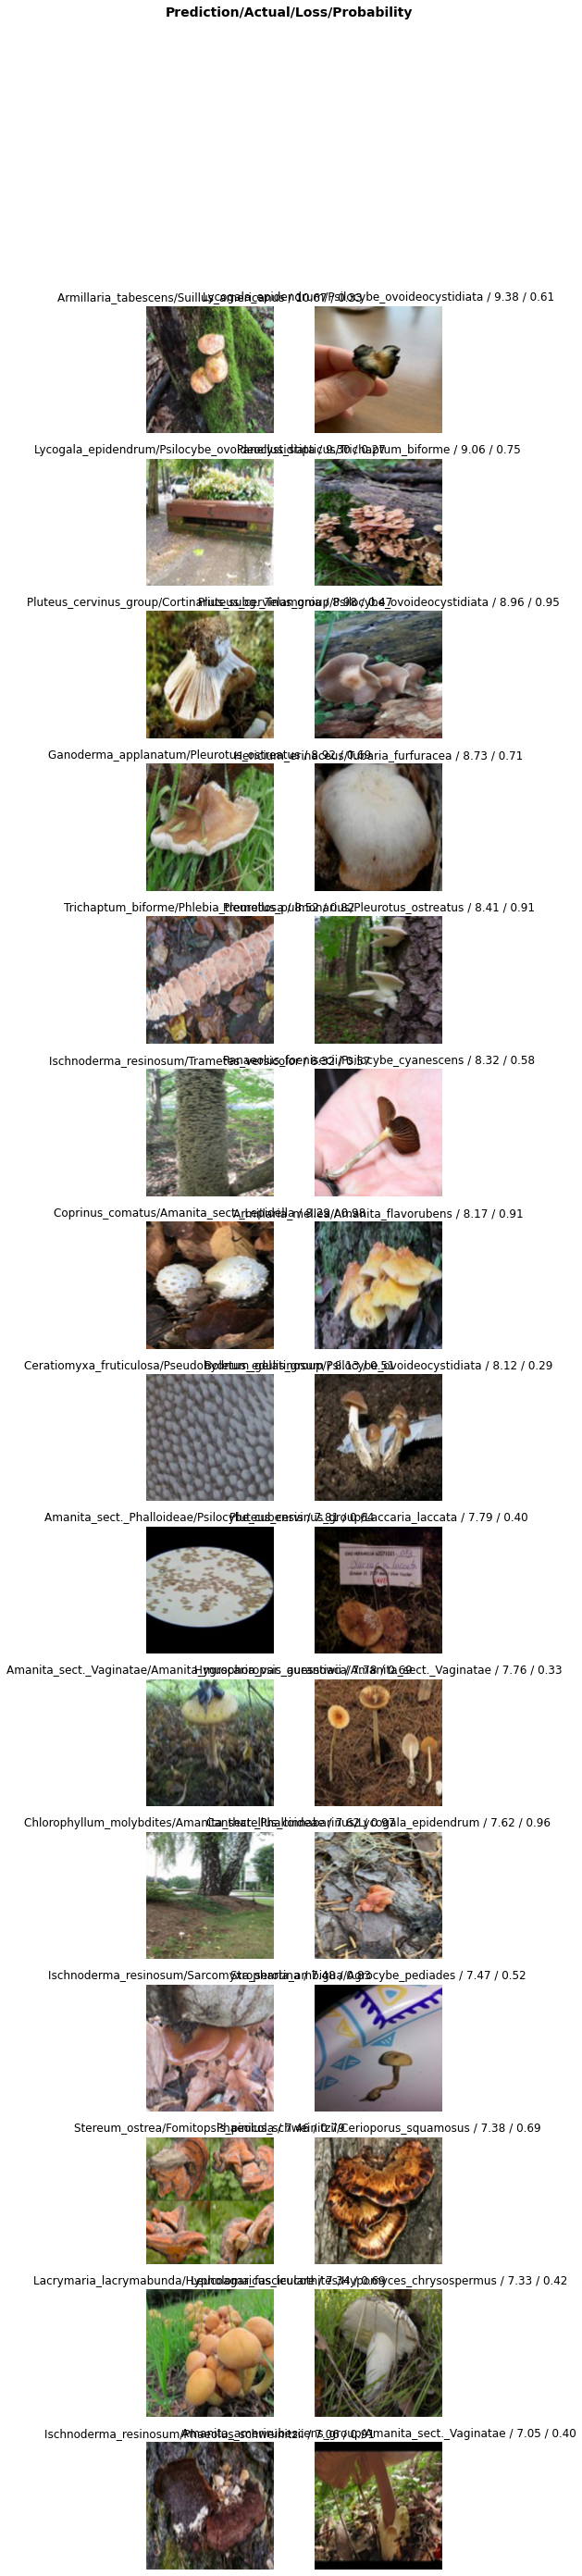

In [7]:
learn.load("sample-100x100-model")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(30, nrows=15)

In [8]:
# Copy saved movel to Google Drive so it can be saved and potentially downloaded and used elsewhere
from google.colab import drive
drive.mount('/content/drive')
!cp /root/.fastai/data/mo_100_100/models/sample-100x100-model.pth /content/drive/MyDrive

Mounted at /content/drive


In [9]:
import os

download_images("tmp", urls=["https://images.mushroomobserver.org/orig/1400576.jpg"])
os.listdir("tmp")
path = Path("tmp", os.listdir("tmp")[0])
learn.predict(path)

('Agaricus_xanthodermus',
 TensorBase(0),
 TensorBase([9.6335e-01, 1.9729e-06, 1.9591e-06, 4.4580e-05, 6.3825e-06,
             5.0407e-06, 7.5556e-07, 2.3289e-05, 9.1294e-06, 3.2076e-04,
             2.2883e-05, 1.0009e-05, 1.0198e-03, 3.8958e-05, 4.2725e-07,
             3.1935e-07, 1.0900e-06, 9.4001e-06, 1.6086e-04, 2.6514e-05,
             1.2182e-06, 6.1818e-06, 2.3279e-03, 1.5419e-04, 4.6528e-03,
             3.0604e-04, 3.3352e-05, 1.8483e-05, 8.1092e-07, 1.4968e-05,
             1.3253e-03, 1.3105e-06, 4.8792e-05, 1.7486e-06, 4.5805e-07,
             1.1646e-05, 1.9106e-04, 3.1509e-06, 1.9462e-06, 8.5144e-06,
             1.1807e-03, 2.2620e-06, 2.4691e-06, 1.7211e-05, 9.1836e-05,
             2.0274e-05, 2.1087e-05, 6.0753e-07, 6.6977e-05, 4.1804e-06,
             1.8330e-04, 3.0887e-04, 1.7582e-06, 5.4385e-07, 5.9635e-04,
             2.6351e-03, 1.2731e-03, 6.4093e-05, 7.5498e-05, 4.8902e-05,
             5.8354e-05, 9.7297e-05, 6.6651e-06, 2.7668e-06, 2.4214e-05,
         